In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('../src/static/IEA-EV-dataEV-salesHistoricalCars.csv')
df['year'] = pd.to_datetime(df['year'], format='%Y')
df = df.dropna()
df = df[df["parameter"] == "Oil displacement, million lge"][['year','value']]
df = df.groupby(['year']).mean().reset_index()

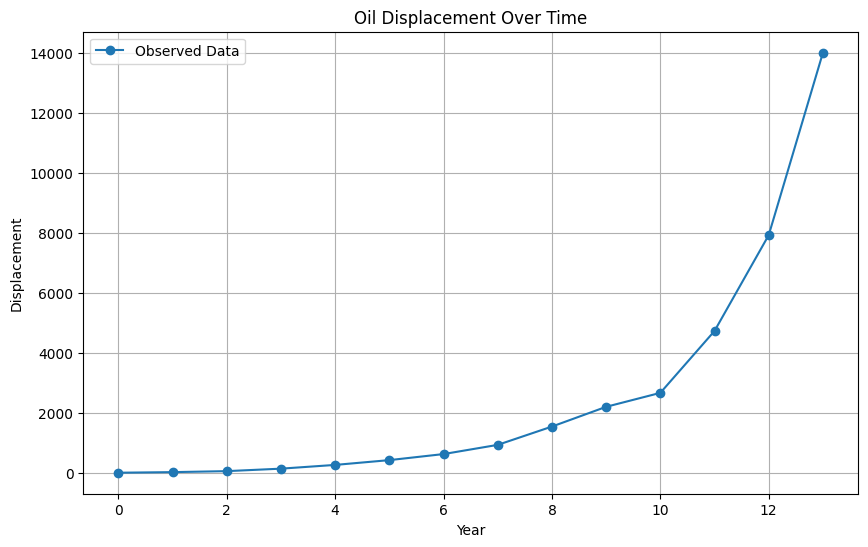

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], marker='o', label='Observed Data')
plt.title('Oil Displacement Over Time')
plt.xlabel('Year')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

In [4]:
model = ARIMA(df['value'], order=(2, 1, 1))
model_fit = model.fit()

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   14
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -105.043
Date:                Tue, 10 Dec 2024   AIC                            218.086
Time:                        20:24:56   BIC                            220.346
Sample:                             0   HQIC                           217.622
                                 - 14                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9073      0.763      2.499      0.012       0.411       3.403
ar.L2         -0.9073      0.640     -1.417      0.157      -2.163       0.348
ma.L1         -0.2332      2.040     -0.114      0.9

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
forecast_years = 5
forecast = model_fit.forecast(steps=forecast_years)
future_years = np.arange(df.index[-1] + 1, df.index[-1] + 1 + forecast_years)

In [8]:
forecast_df = pd.DataFrame({'year': future_years, 'value': forecast})
forecast_df.set_index('year', inplace=True)
combined_df = pd.concat([df, forecast_df])

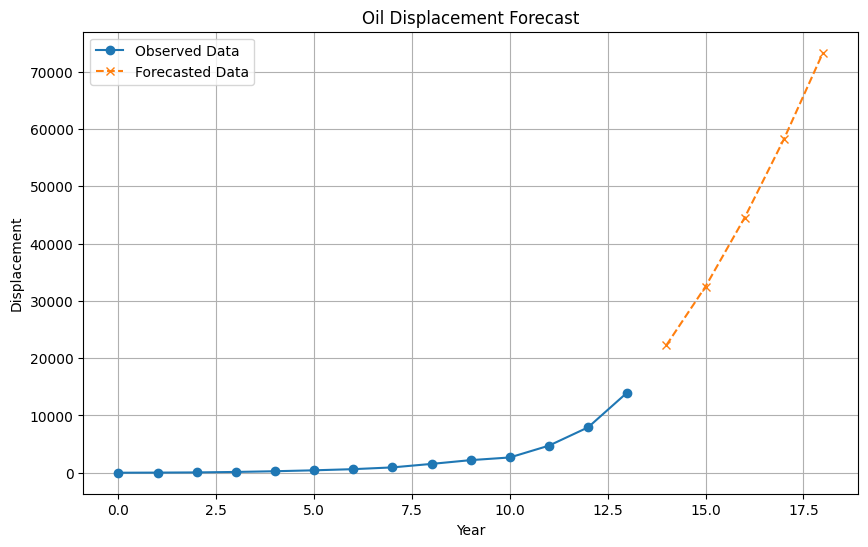

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], marker='o', label='Observed Data')
plt.plot(forecast_df.index, forecast_df['value'], marker='x', linestyle='--', label='Forecasted Data')
plt.title('Oil Displacement Forecast')
plt.xlabel('Year')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

In [16]:
train = df['value'][:-5]
test = df[['value','year']][-5:]
model = ARIMA(train, order=(2, 1, 1))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [18]:
mse = mean_squared_error(test['value'], predictions)
mae = mean_absolute_error(test['value'], predictions)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 6059264.933180433
Mean Absolute Error (MAE): 1653.3358190614624


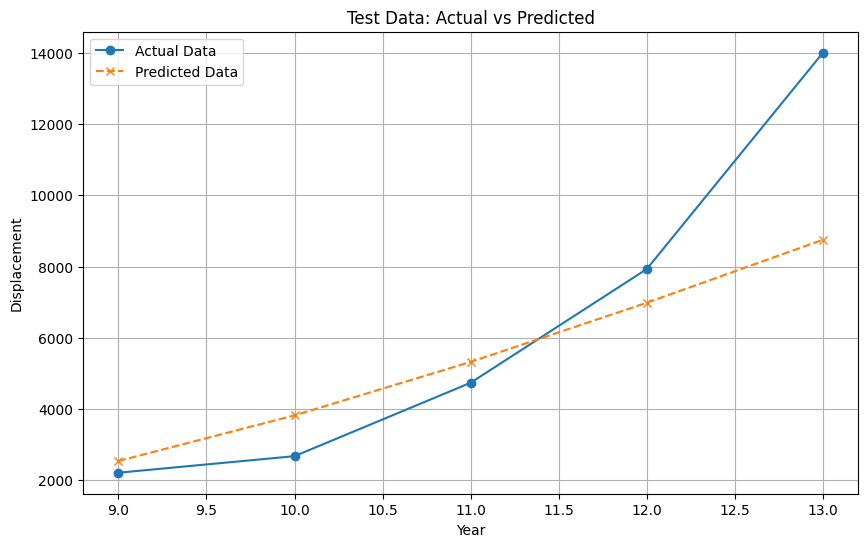

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['value'], marker='o', label='Actual Data')
plt.plot(test.index, predictions, marker='x', linestyle='--', label='Predicted Data')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Year')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()